# Explorative Datenanalyse des NYCFlights Datensatzes

### Vorwissen:
Mit einem gewissen Vorwissen in Statistik (Basics aus MA3) haben Sie mehr von der Veranstaltung. Die wichtigsten Grundlagen finden Sie zum Beispiel in:
- Kopp-Schneider, Werft “Grundlagen der Statistik” in Medizinische Physik: https://link.springer.com/book/10.1007%2F978-3-662-54801-1

### Literatur zum Nachschlagen während des Labors (Links auf moodle): 
- Bruce et al. Praktische Statistik für Data Scientists, Kapitel 1 bis Seite 31
- Sauer, Moderne Datenanalyse mit R: Wir machen eine ähnliche Analyse mit Python wie in Kapitel 10 (ohne 10.2.3) mit R beschrieben
- Python-Dokumentationen, z.B. VanderPlas: Data Science mit Python

### Sie werden hier:
- Datensatz einlesen/laden
- Daten als Tabelle anschauen: typische Datenstruktur für Data Science: pandas DataFrame
- Unterschiedliche Skalentypen der Daten erkennen
- Kategoriale Daten visualisieren (Welche Datentypen sind kategorial?)
- Metrische (kontinuierlich oder diskret mit vielen Werten) Daten visualisieren und nach Kategorien sortiert visualisieren
- Zusammenhänge zwischen metrischen Daten visualisieren und interpretieren
- den NYCFlights Datensatz erkunden

### Lernziele:
- Sie haben eine erste Idee wie eine explorative Datenanalyse funktioniert und sich schon einmal in einen Datensatz vertieft.
- Sie erkennen unterschiedliche Datentypen und können Daten unterschiedlicher Datentypen geeignet visualisieren.
- Sie können Visualisierungen nach verschiedenen Kategorien in Python nutzen und wissen, wann welche Visualisierung sinnvoll ist.

### Output:
- 1 Graph Ihrer Wahl (jede/r wird vermutlich etwas anderes finden, was sie/er interessant findet. Zu Beginn der nächsten Vorlesung werden wir alle Graphen anschauen und so unser Wissen über den Datensatz erweitern). Bitte bis nächsten Dienstag auf moodle hochladen. Bitte stellen Sie die Daten so dar, dass sie auf einer Folie erkennbar sind (Größe der Achsenbeschriftung, etc.).

In [6]:
#Nötige Module importieren

#Daten einlesen und Daten verarbeiten
import pandas as pd

#Plotten
import matplotlib.pyplot as plt

#zum (einfacheren) Erstellen guter statistischer Plots:
import seaborn as sns

sns.set_theme()  # alle Plots (auch von matplotlib) im seaborn-Style

# Numerische und statistisches Werkzeug
import numpy as np
from scipy import stats

## Anleitung

Im Folgenden sollen Sie versuchen mit Hilfe von Visualisierungen einen (ersten) Überblick über den NYCFlights Datensatz zu bekommen. Für einfache und gute statistische Datenvisualisierungen eignet sich das Paket `seaborn`. Es basiert auf `matplotlib`. Es vereinfacht sehr viele Vorgänge und liefert überaus nützliche und hochwertige Graphen: 
https://seaborn.pydata.org/index.html

Ändern von Darstellung und Beschriftung etc. basiert auf matplotlib. Die Dokumentation finden Sie unter: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

In der letzten Anleitung gab es hierzu schon die ersten Graphen. Nun wollen wir uns etwas genauer mit dem Datensatz beschäftigen. Wir fokussieren uns in diesem Labor darauf, Daten abhängig von verschiedenen Kategorien zu visualisieren. Verteilungen von kontinuierlichen Daten betrachten wir in späteren Laboren.

### 1. Analyse der Datentypen und Erstellung eines Codebooks
Wir nutzen den NYC Flights Datensatz gekürzt um die fehlenden Werte (siehe 0_ExplorativeDatenanalyse_Einführung). Bevor wir mit Visualisierungen starten, müssen wir die Art der Variablen kennen. Schauen Sie sich die Datentabelle an und notieren Sie kurz für jede Variable:

- Bedeutung (können Sie mit dem Namen etwas anfangen? Schauen Sie ggf. in die Dokumentation!)
- Datentyp und Skalenniveau
- Möglicher Wertebereich, Einheit etc. 
- evtl. weitere Anmerkungen (z.B. Anzahl fehlender Werte)

In [7]:
from nycflights13 import flights
fls = flights.dropna()
fls.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [8]:
#TODO: Erstellen eines einfachen, kurzen CodeBook
# Year:  - Datentyp: ganzzahlig
#        - Skalenniveau: kategorial
#        - Wertebereich: 2013
#        - Einheit: einheitslos
# 
# Month:  - Datentyp: ganzzahlig
#         - Skalenniveau: kategorial
#         - Wertebereich: 1-12
#         - Einheit: einheitslos
#
# Day:    - Datentyp: ganzzahlig
#         - Skalenniveau: kategorial
#         - Wertebereich: 1-31
#         - Einheit: einheitslos
#
# Abflug-Zeit:  - Datentyp: dezimalzahl
#               - Skalenniveau: numerisch
#               - Wertebereich: 
#               - Einheit: stunde:minute

### 2. Analyse der Kategorien

Sie haben nun geschaut welche Variablen kategorisch vorliegen. Finden Sie heraus, wie viele verschiedene Kategorien es jeweils gibt. Starten Sie auch hier mit Visualisierungen durch geeignete Balkendiagramme (sns.countplots). Für Details können Sie dann immer noch rechnen. Einen ersten Plot sollten Sie schon mit der letzten Anleitung erstellt haben. Schauen Sie sich jetzt alle Kategorien an. Evtl. stellen Sie dabei fest, dass eine der Kategorien, die Sie als kategorial einsortiert hatten, eigentlich nicht kategorial ist, sondern z.B. numerisch vorliegt, aber nur wenige verschiedene Werte annehmen kann.

Um auf ein Element einer Variable zuzugreifen: `'variablenname'[[index]]` (index beginnt bei 0) (z.B. `fls.year[[0]]`)

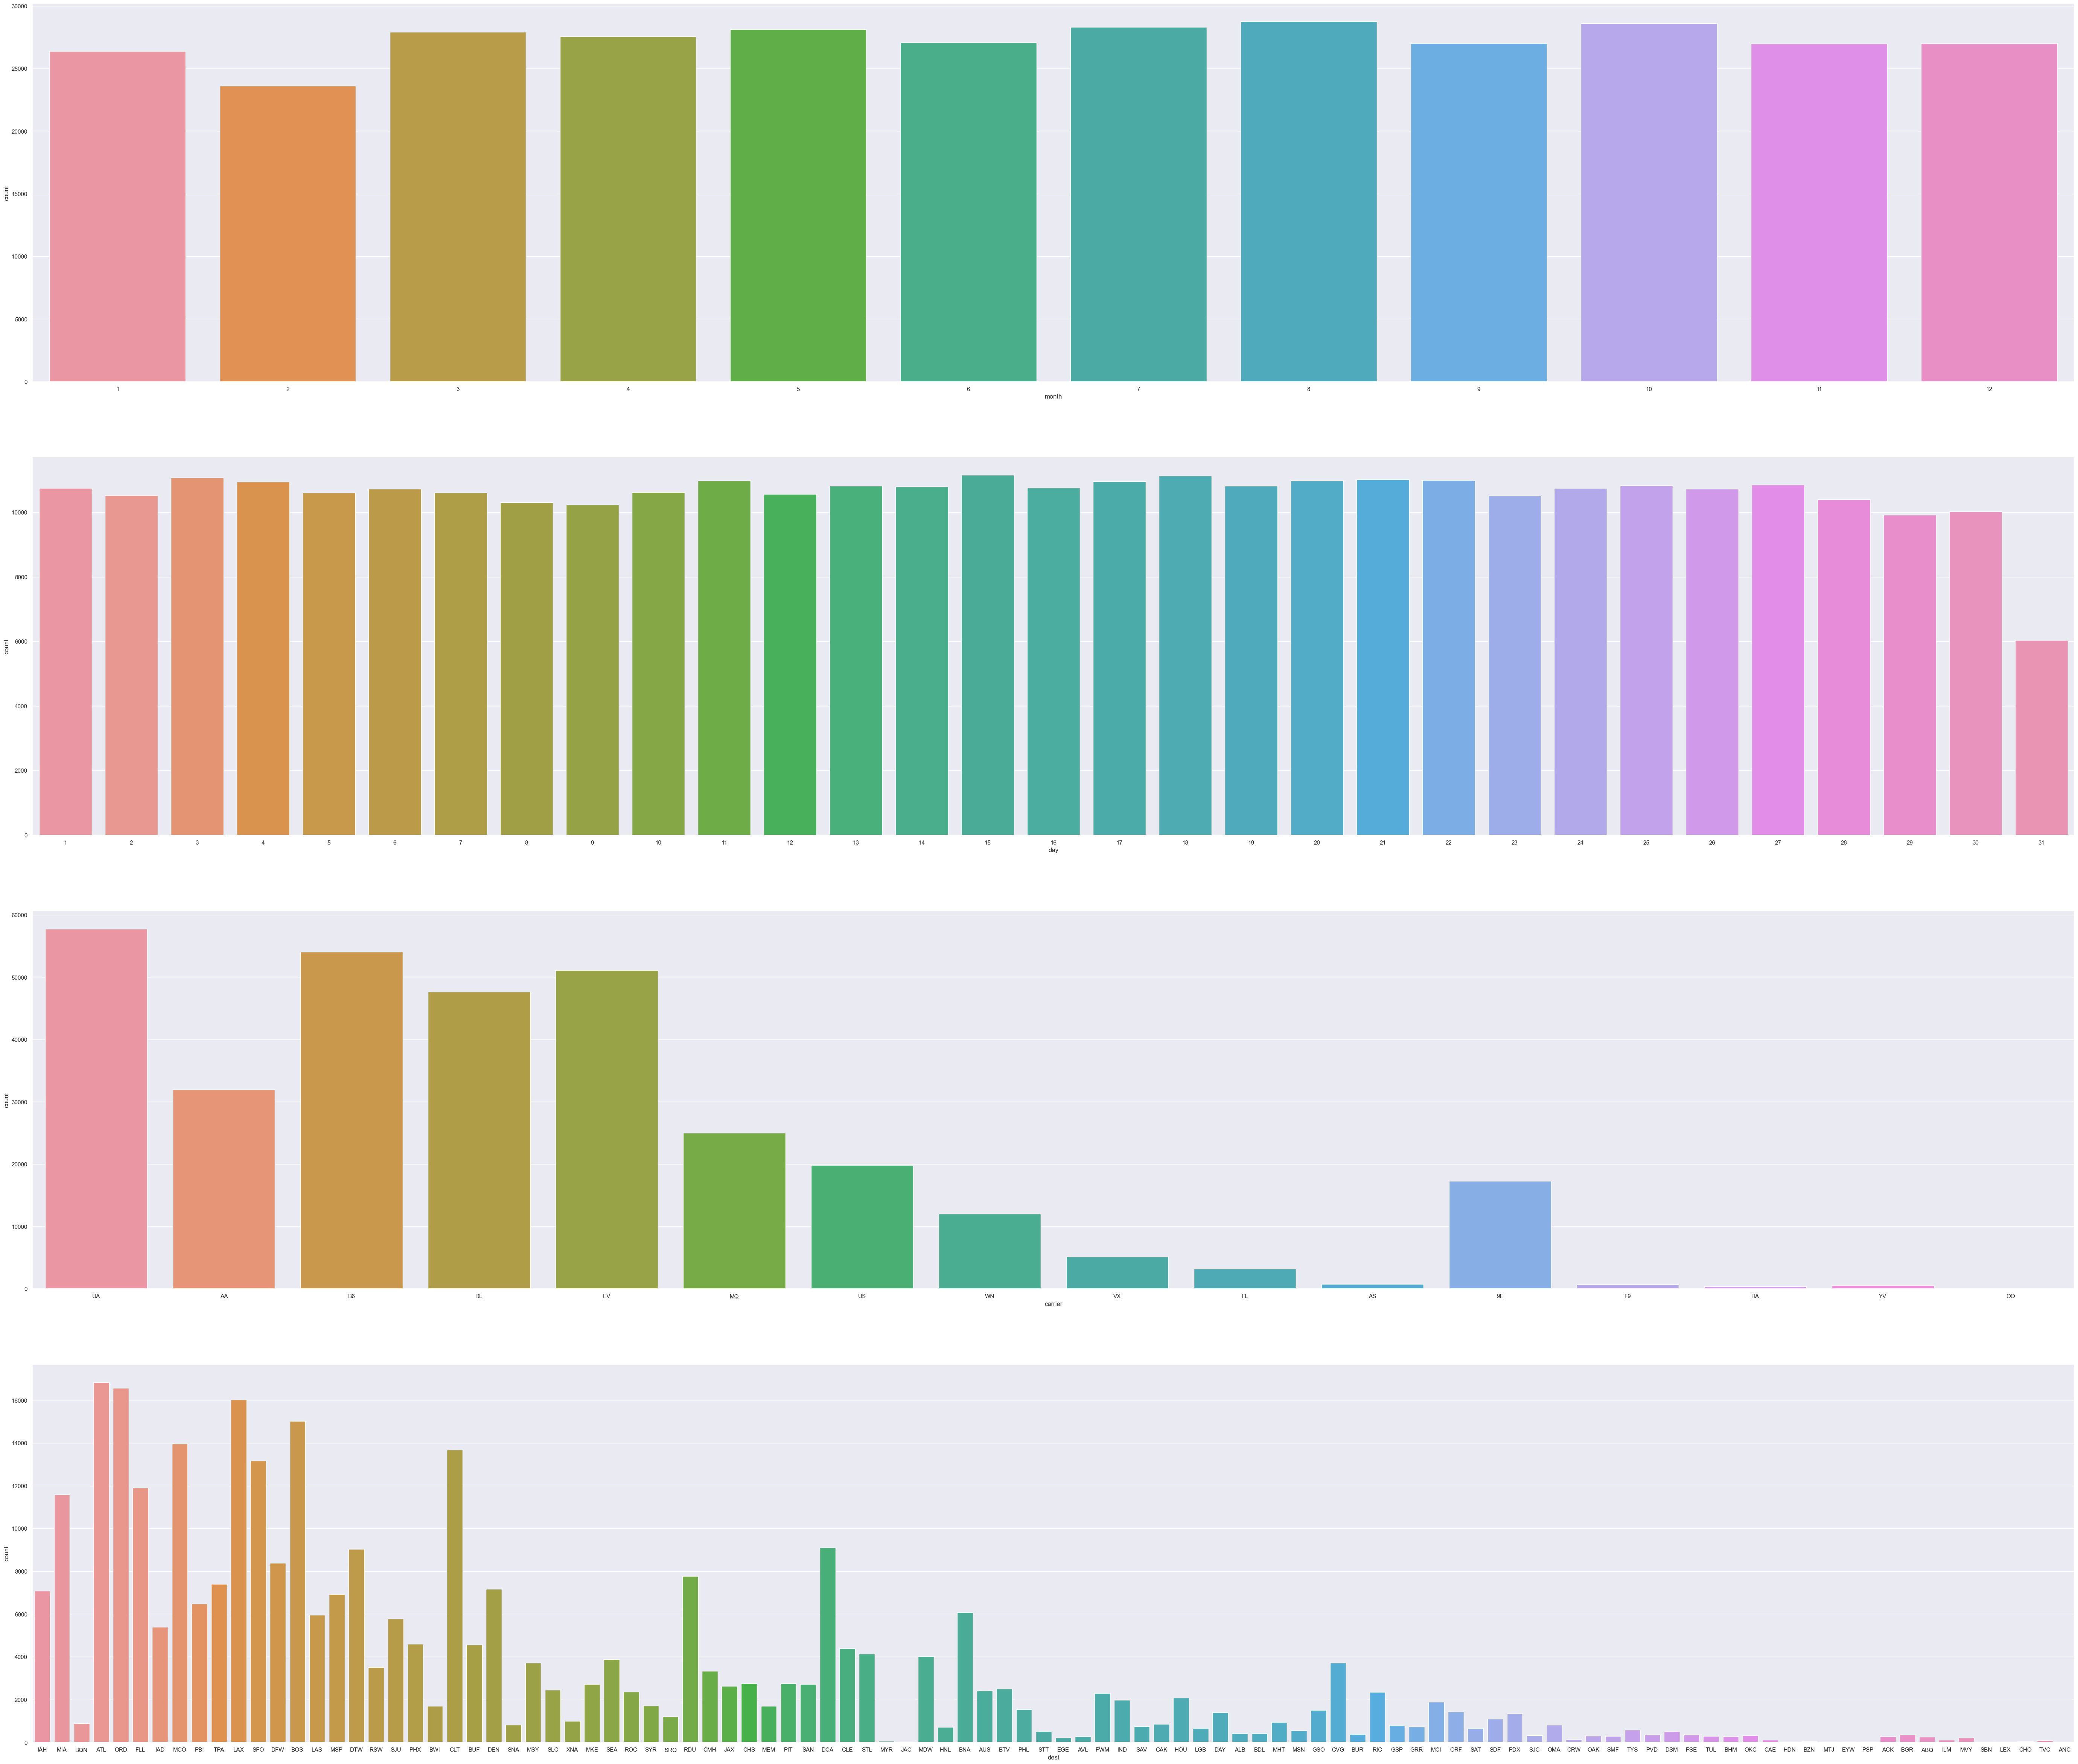

In [9]:
#TODO: Analyse der Kategorien
fig, axs = plt.subplots(4, 1, figsize=(70, 60))
sns.countplot(data=fls, x='month',ax=axs[0])
sns.countplot(data=fls, x='day', ax=axs[1])
sns.countplot(data=fls, x='carrier',ax=axs[2])
sns.countplot(data=fls, x='dest',ax=axs[3])
plt.show()

### 3. Einfluss der kategorialen Variablen auf die kontinuierlichen Variablen

Sie haben nun einen Überblick über die kategorialen Variablen. Nun wollen wir explorieren, welche Kategorien Einfluss auf welche kontinuierlichen Variablen haben. Dazu nutzt man am besten Visualisierungen. Sie können mit den vorgeschlagenen Möglichkeiten aus der letzten Anleitung starten und auch andere testen:

- Boxplot: grafische Übersicht der wichtigsten Quantile. Praktischerweise dann auch für verschiedene Kategorien einer Variable getrennt möglich
- Violinplot: kombiniert Dichteschätzer und Boxlot (Box nimmt Form der geschätzten Dichtefunktion an)
- Kategoriale Barplots verschiedener Metriken (Mittelwert, Median, etc.)
- diese und weitere Möglichkeiten z.B. auf: https://seaborn.pydata.org/tutorial/categorical.html

Nehmen Sie sich genug Zeit den Datensatz zu erkunden und erstellen Sie dann einen Graph zu einem Aspekt, den Sie interessant finden.
Sie dürfen natürlich auch Zusammenhänge zwischen kontinuierlichen Variablen untersuchen. Die Visualisierung in Streudiagrammen ist Ihnen aber vermutlich deutlich bekannter als der Einsatz kategorialer Variablen in Visualisierungen, achten Sie daher darauf, dass in Ihrem Graphen auch kategoriale Variablen vorkommen.

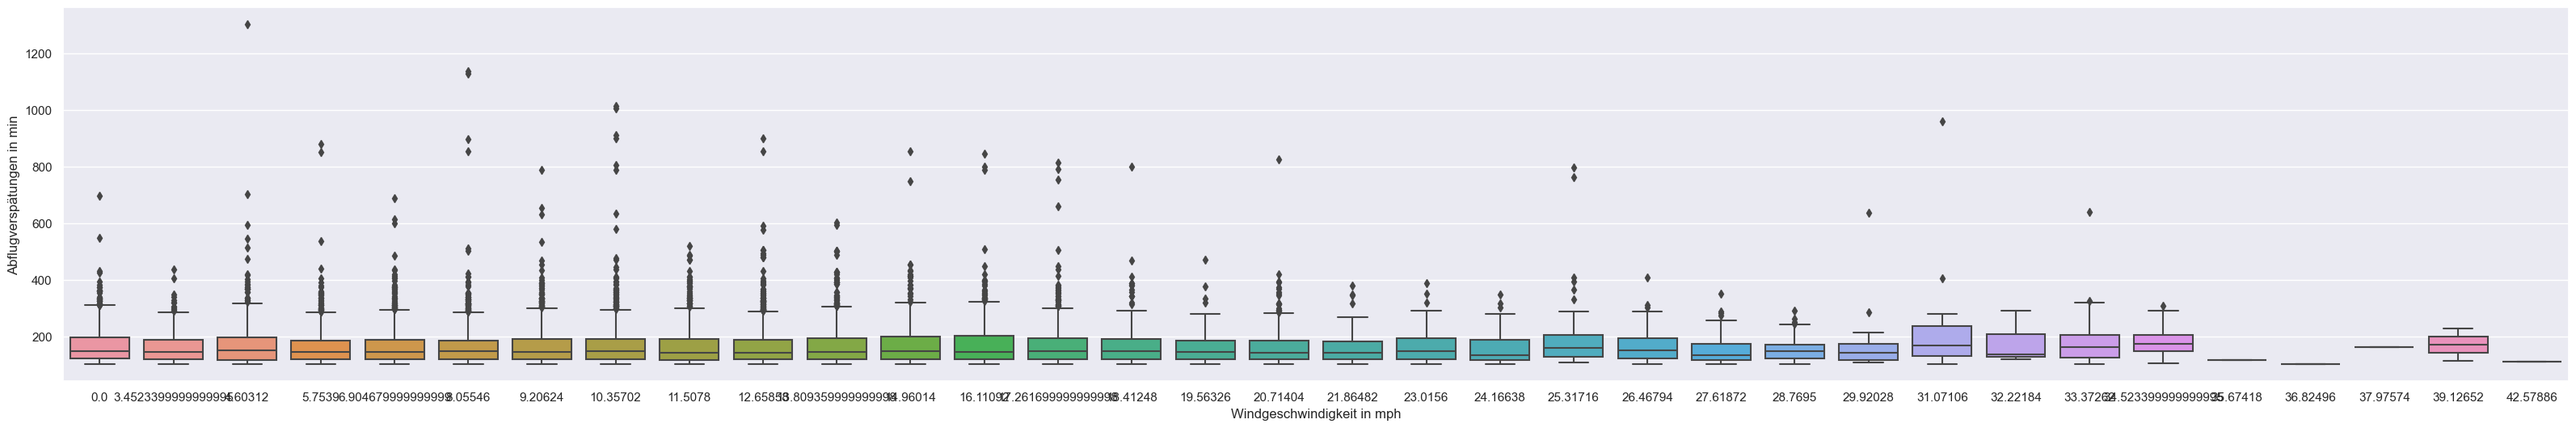

In [40]:
# TODO: Exploration des Datensatzes durch Visualisierungen
from nycflights13 import weather
fls = pd.merge(flights, weather, on=['year', 'month', 'day', 'hour', 'origin'])

große_verspätungen = fls[fls['dep_delay'] > 100]

plt.figure(figsize=(50, 6))
sns.boxplot(x=große_verspätungen['wind_speed'], y=große_verspätungen['dep_delay'])

plt.xlabel('Windgeschwindigkeit in mph')
plt.ylabel('Abflugverspätungen in min')
plt.savefig('graph.png')

plt.show()
